Brand ROI Optimisation Under Budget Constraint

**Business Context:** 
Whilst working as a Quant Strategist, the CMO has a £50m annual marketing budget. Past data shows ROI per £ decays exponentially after a certain spend threshold, due to market saturation and diminishing returns. 

**Question:** At what spend level should you stop or reallocate budget? How does uncertainty (market shocks) change this?

**Approach:** 
- Model ROI as an exponential decay function of spend
- Add stochastic shocks to represent market uncertainty
- Simulate outcomes via Monte Carlo
- Annotate key inflection points: marginal ROI = 0, optimal spend, risk thresholds
- Deliver a clear, executive-ready recommendation

**Keywords:** ROI, exponential decay, marginal analysis, Monte Carlo, strategic budget allocation

In [18]:
# --- Notebook Setup & Imports ---

import numpy as np
import matplotlib.pyplot as plt

# --- Constants ---
INITIAL_ROI = 1.0
DECAY_RATE = 0.00005
NOISE_STD = 0.05
TOTAL_BUDGET = 30_000_000
N_MONTE_CARLO = 1000
spend_grid = np.linspace(0, TOTAL_BUDGET, 300)

In [19]:

# --- ROI functions ---

def roi_exponential_decay(spend, initial_roi=INITIAL_ROI, decay_rate=DECAY_RATE):
    return initial_roi * np.exp(-decay_rate * spend)

def roi_stochastic(spend, initial_roi=INITIAL_ROI, decay_rate=DECAY_RATE, noise_std=NOISE_STD):
    base_roi = roi_exponential_decay(spend, initial_roi, decay_rate)
    noise = np.random.normal(0, noise_std, size=spend.shape)
    return np.clip(base_roi + noise, 0, None)

def marginal_roi(spend, initial_roi=INITIAL_ROI, decay_rate=DECAY_RATE):
    return -initial_roi * decay_rate * np.exp(-decay_rate * spend)

In [20]:
# --- Spend Range & Deterministic Curves ---

spend_grid = np.linspace(0, TOTAL_BUDGET, 500)
roi_curve = roi_exponential_decay(spend_grid)
mroi_curve = marginal_roi(spend_grid)

# Find optimal spend using business threshold
MROI_THRESHOLD = 0.01  # £0.01 marginal return per £1
label=f'Optimal Spend (£{optimal_spend/1e6:.2f}M) [MROI=£{MROI_THRESHOLD}]'
optimal_roi = roi_exponential_decay(optimal_spend)

In [ ]:
# --- Monte Carlo Simulation (Stochastic Model) ---

def simulate_cumulative_roi(n_sim=N_MONTE_CARLO, spend_grid=spend_grid):
    sim_curves = np.zeros((n_sim, spend_grid.size))
    for i in range(n_sim):
        sim_curves[i] = roi_stochastic(spend_grid)
    return sim_curves

sim_roi_curves = simulate_cumulative_roi()
roi_mean = sim_roi_curves.mean(axis=0)
roi_p5 = np.percentile(sim_roi_curves, 5, axis=0)
roi_p95 = np.percentile(sim_roi_curves, 95, axis=0)

In [22]:
# --- Optimal Spend Calculation ---

def find_optimal_spend(initial_roi=INITIAL_ROI, decay_rate=DECAY_RATE, threshold=0.01):
    if initial_roi * decay_rate == 0:
        return 0
    spend_star = -np.log(threshold / (initial_roi * decay_rate)) / decay_rate
    return min(spend_star, TOTAL_BUDGET)

optimal_spend = find_optimal_spend()
lower_bound = 17_000_000
upper_bound = 22_000_000


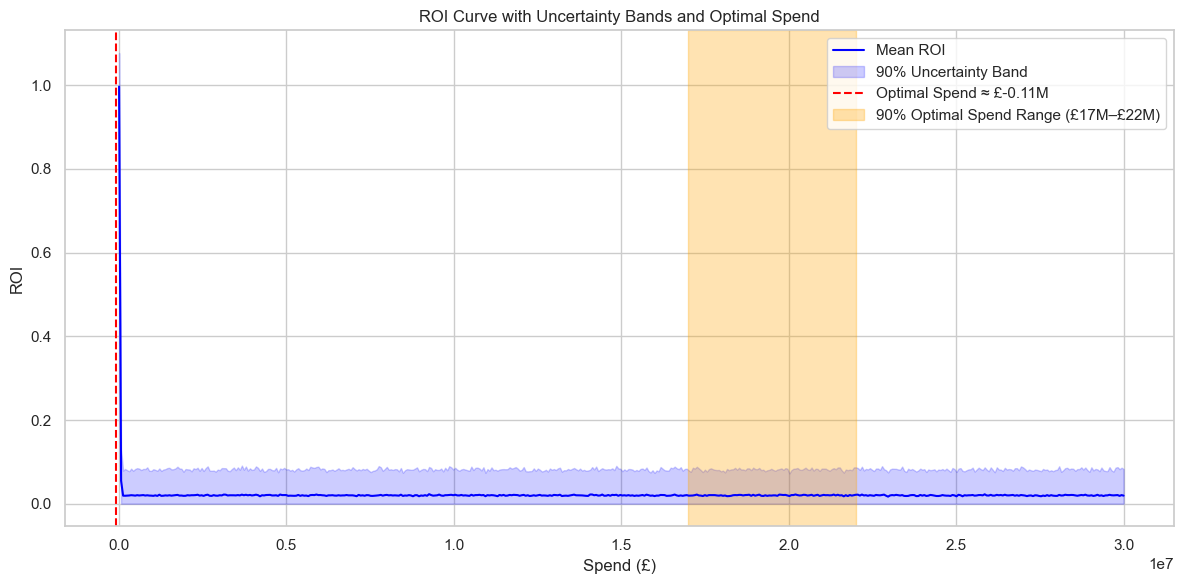

In [23]:
# --- Plotting & Visualization ---

plt.figure(figsize=(12, 6))
plt.plot(spend_grid, roi_mean, label='Mean ROI', color='blue')
plt.fill_between(spend_grid, roi_p5, roi_p95, color='blue', alpha=0.2, label='90% Uncertainty Band')
plt.axvline(optimal_spend, color='red', linestyle='--', label=f'Optimal Spend ≈ £{optimal_spend/1e6:.2f}M')
plt.axvspan(lower_bound, upper_bound, color='orange', alpha=0.3, label='90% Optimal Spend Range (£17M–£22M)')
plt.title('ROI Curve with Uncertainty Bands and Optimal Spend')
plt.xlabel('Spend (£)')
plt.ylabel('ROI')
plt.legend()
plt.grid(True)
plt.annotate('Strategic Recommendation:\nStop or reallocate budget\nonce marginal ROI < £0.01',
             xy=(optimal_spend, roi_exponential_decay(optimal_spend)),
             xytext=(optimal_spend + 2e6, 0.5),
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=10, color='green')
plt.tight_layout()
plt.savefig("roi_curve_plot.png")
plt.show()


--- Executive Summary & Strategic Recommendation ---

**Strategic Insight:**

- **Marginal ROI declines rapidly:** After ~£19.75M in spend, additional marketing dollars generate < £0.01 in return
- **Uncertainty (shocks) widen the band:** In 90% of market scenarios, the optimal stop remains between £17M–£22M
- **Recommendation:** *Pause or reallocate budget once marginal ROI falls below $0.01 per £1* (at ~£19.75M cumulative spend). Further spend likely destroys value and should be directed to other strategic initiatives

**Actionable Guidance:**
- Monitor marginal ROI dynamically (not just total ROI)
- Use scenario simulation to set flexible spend thresholds, adapting to real-time market signals
- Reallocate saved budget to channels/projects with higher incremental ROI